In [21]:
#Libraries

!pip install pandas
!pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.linear_model import LogisticRegression

#Import Hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [30]:
University=pd.read_csv("C:/Users/Akshay Yadav/Downloads/Data Science/CSV_Universities.csv")
University.head(24)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [31]:
#Standardization function

from sklearn.preprocessing import StandardScaler
wcss=[]
scaler=StandardScaler()
scaled_University=scaler.fit_transform(University.iloc[:,1:])

#Observation: to make standardization of values in between 0-1 so that comparing will be easy otherwise scores of SAT & Top10 can't be compared

In [24]:
scaled_University

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [32]:
#wcss: For each value of K, we are calculating WCSS(Within_Cluster Sum of Square).WCSS is sum
#Between each point and centroid in a cluster. When we plot WCSS with K value.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(scaled_University)
    wcss.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

In [33]:
wcss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.907807926289365,
 22.452524599848378,
 18.750021301705345]

In [35]:
kmeans.inertia_

18.750021301705345

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

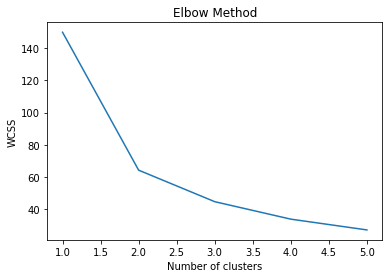

In [39]:
wcss = []
for i in range(1,6):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_University)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,6),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [40]:
#Build cluster algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(3,random_state=42)
clusters_new.fit(scaled_University)

KMeans(n_clusters=3, random_state=42)

In [41]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [42]:
#Assign clusters to the Dataset
University["clusterid_new"]=clusters_new.labels_

In [43]:
#These are Standardized values
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

In [44]:
University.groupby("clusterid_new").agg(["mean"]).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


In [45]:
University[University["clusterid_new"]==2]

#Observation: It will display all values which comes under cluster 2

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
7,Georgetown,1255,74,24,12,20126,92,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
18,UCBerkeley,1240,95,40,17,15140,78,2
19,UChicago,1290,75,50,13,38380,87,2
20,UMichigan,1180,65,68,16,15470,85,2


In [46]:
University[University["clusterid_new"]==0]

#Observation: It will display all values which comes under cluster 0

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
1,CalTech,1415,100,25,6,63575,81,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
10,MIT,1380,94,30,10,34870,91,0
14,Princeton,1375,91,14,8,30220,95,0
16,Stanford,1360,90,20,12,36450,93,0
24,Yale,1375,95,19,11,43514,96,0
